In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Train.csv

In [49]:
df_1 = pd.read_csv('train.csv')
df_1

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


### Check for Null Values

In [50]:
df_1.isna().mean()

Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday       0.0
dtype: float64

**There are no Null values**

### Statistical and Descriptive Information about the dataset

In [51]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


* We can observe that date is object type in loaded dataset converting it to datetime type

In [52]:
df_1['Date'] = pd.to_datetime(df_1['Date'])

In [53]:
df_1.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [54]:
df_1.describe()

,Store,Dept,Date,Weekly_Sales
count,421570.000000,421570.000000,421570,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000
std,12.785297,30.492054,NaN,22711.183519


Weekly Sales shows negative values but sales cannot be negative so we need to check how many negative values are there

In [55]:
df_1.loc[df_1['Weekly_Sales']<0]

,Store,Dept,Date,Weekly_Sales,IsHoliday
846,1,6,2012-08-10,-139.65,False
2384,1,18,2012-05-04,-1.27,False
6048,1,47,2010-02-19,-863.00,False
6049,1,47,2010-03-12,-698.00,False
6051,1,47,2010-10-08,-58.00,False
...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True
419598,45,80,2010-02-19,-0.27,False
419603,45,80,2010-04-16,-1.61,False
419614,45,80,2010-07-02,-0.27,False


There are 1285 rows having negative values

In [56]:
df_1 = df_1.loc[df_1['Weekly_Sales']>=0]

In [57]:
df_1.shape

(420285, 5)

### Check for Duplicates

In [58]:
df_1.loc[df_1.duplicated()]

,Store,Dept,Date,Weekly_Sales,IsHoliday


In [59]:
df_1.duplicated().sum()

0

**There are no duplicates in this dataset**

### Checking for Outliers in Sales columns

<Axes: >

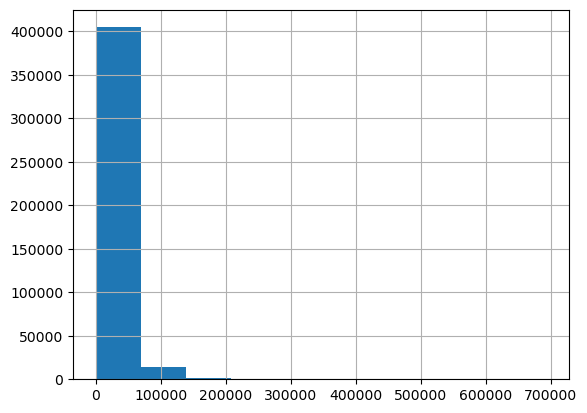

In [60]:
df_1['Weekly_Sales'].hist()

In [61]:
df_1.loc[df_1['Weekly_Sales']>350000]

,Store,Dept,Date,Weekly_Sales,IsHoliday
37201,4,72,2010-11-26,381072.11,True
37253,4,72,2011-11-25,385051.04,True
88428,10,7,2010-12-24,406988.63,False
95373,10,72,2010-11-26,693099.36,True
95377,10,72,2010-12-24,404245.03,False
95425,10,72,2011-11-25,630999.19,True
115222,12,72,2010-11-26,359995.60,True
115274,12,72,2011-11-25,360140.66,True
128984,14,7,2010-12-24,356867.25,False
135665,14,72,2010-11-26,474330.10,True


There are only few high sales though can be justified by few days where sales are really high  as most of those days are holidays

In [62]:
df_1['IsHoliday'].value_counts()

IsHoliday
False    390722
True      29563
Name: count, dtype: int64

## Stores

In [63]:
df_2 = pd.read_csv('stores.csv')

In [64]:
df_2

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


### Checking for Null values

In [65]:
df_2.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

No null values

### Statistical and Descriptive Information about dataset 

In [66]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [67]:
df_2.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


### Check for Duplicates

In [68]:
df_2.duplicated().sum()

0

No Duplicates

In [69]:
df_2['Type'].value_counts()

Type
A    22
B    17
C     6
Name: count, dtype: int64

## Features

In [70]:
df_3 = pd.read_csv('features.csv')

In [71]:
df_3

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


## Check for Null values

In [72]:
df_3.isna().mean()

Store           0.000000
Date            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.507692
MarkDown2       0.643346
MarkDown3       0.558852
MarkDown4       0.577045
MarkDown5       0.505495
CPI             0.071429
Unemployment    0.071429
IsHoliday       0.000000
dtype: float64

There a lot of null values in this dataset:
* Null values in markdown columns can be justified by the markdown values being only during promotional events or discount days. So we can consider them as 0.
* Though CPI and Unemployment as only 7 % null values so we can remove those values from the dataset. 

In [73]:
df_3.dropna(subset=['CPI','Unemployment'],inplace=True)

In [74]:
df_3.shape

(7605, 12)

In [75]:
df_3.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4156
MarkDown2       5164
MarkDown3       4521
MarkDown4       4631
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
dtype: int64

In [76]:
df_3.fillna(0,inplace=True)

In [77]:
df_3

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8172,45,2013-03-29,40.68,3.784,5444.00,0.00,350.84,53.90,1722.11,193.442790,8.625,False
8173,45,2013-04-05,43.94,3.763,16427.83,5341.41,182.59,1523.83,1743.09,193.516047,8.335,False
8174,45,2013-04-12,57.39,3.724,8760.15,1713.11,21.08,1302.31,1380.74,193.589304,8.335,False
8175,45,2013-04-19,56.27,3.676,1399.81,39.89,44.38,60.83,1445.05,193.589304,8.335,False


In [78]:
df_3.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

### Descriptive and Statistics Information About the dataset

In [79]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7605 entries, 0 to 8176
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         7605 non-null   int64  
 1   Date          7605 non-null   object 
 2   Temperature   7605 non-null   float64
 3   Fuel_Price    7605 non-null   float64
 4   MarkDown1     7605 non-null   float64
 5   MarkDown2     7605 non-null   float64
 6   MarkDown3     7605 non-null   float64
 7   MarkDown4     7605 non-null   float64
 8   MarkDown5     7605 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     7605 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 720.4+ KB


In [80]:
df_3['Date'] = pd.to_datetime(df_3['Date'])

In [81]:
df_3.describe()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,7605.000000,7605,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000
mean,23.000000,2011-09-16 00:00:00,58.297325,3.389624,3331.850502,1257.632682,821.902856,1310.043445,1939.701669,172.460809,7.826821
min,1.000000,2010-02-05 00:00:00,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,126.064000,3.684000
25%,12.000000,2010-11-26 00:00:00,44.720000,3.001000,0.000000,0.000000,0.000000,0.000000,0.000000,132.364839,6.634000
50%,23.000000,2011-09-16 00:00:00,59.250000,3.494000,0.000000,0.000000,0.000000,0.000000,0.000000,182.764003,7.806000
75%,34.000000,2012-07-06 00:00:00,72.620000,3.742000,4167.270000,42.200000,14.740000,564.100000,2511.400000,213.932412,8.567000
max,45.000000,2013-04-26 00:00:00,100.140000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000
std,12.988027,NaN,18.709862,0.441461,7500.751025,5695.768975,7822.371717,4778.286282,9717.363653,39.738346,1.877259


* There are values in markdown columns which are negative. To validate whether they are geniuine values or just incorrect data collection error we can first check the value count of these values

In [82]:
df_3.loc[df_3['MarkDown1']<0].shape

(4, 12)

In [83]:
df_3.loc[df_3['MarkDown2']<0].shape

(24, 12)

In [84]:
df_3.loc[df_3['MarkDown3']<0].shape

(13, 12)

In [85]:
df_3.loc[df_3['MarkDown5']<0].shape

(2, 12)

In [86]:
df_3.query("MarkDown1<0 or MarkDown2<0 or MarkDown3<0 or MarkDown5<0").shape

(43, 12)

Given the number of negative values in the dataset it seems like all of them are just data collection error so deleting those rows

In [87]:
df_3 = df_3.query("MarkDown1>=0 and MarkDown2>=0 and MarkDown3>=0 and MarkDown5>=0")

In [88]:
df_3

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8172,45,2013-03-29,40.68,3.784,5444.00,0.00,350.84,53.90,1722.11,193.442790,8.625,False
8173,45,2013-04-05,43.94,3.763,16427.83,5341.41,182.59,1523.83,1743.09,193.516047,8.335,False
8174,45,2013-04-12,57.39,3.724,8760.15,1713.11,21.08,1302.31,1380.74,193.589304,8.335,False
8175,45,2013-04-19,56.27,3.676,1399.81,39.89,44.38,60.83,1445.05,193.589304,8.335,False


* Removed all the negative values

### Check for duplicates

In [89]:
df_3.duplicated().sum()

0

There are No duplicates

### Checking the skewness and outliers

In [90]:
num_cols = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

Temperature


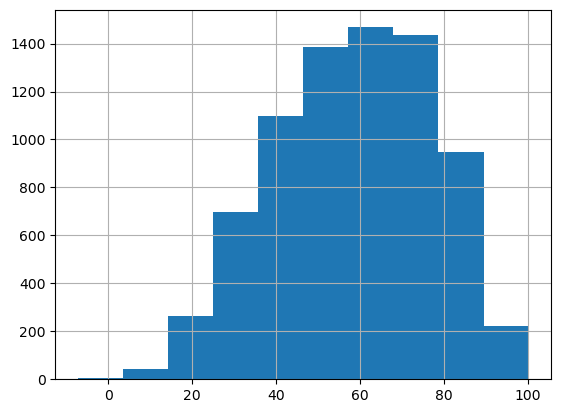

---------------
Fuel_Price


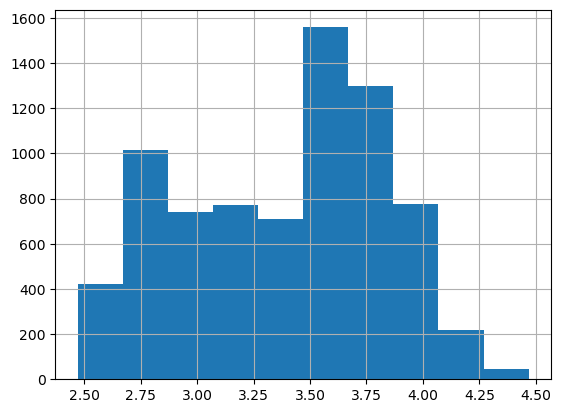

---------------
MarkDown1


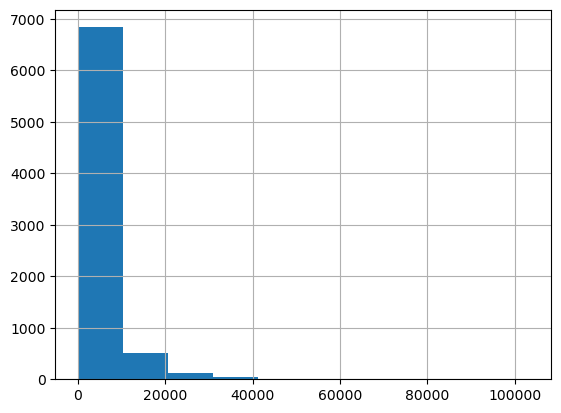

---------------
MarkDown2


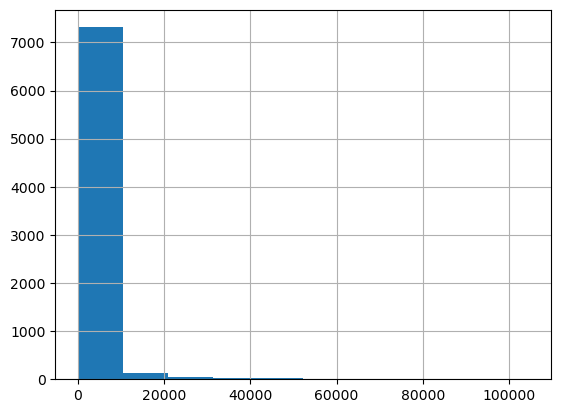

---------------
MarkDown3


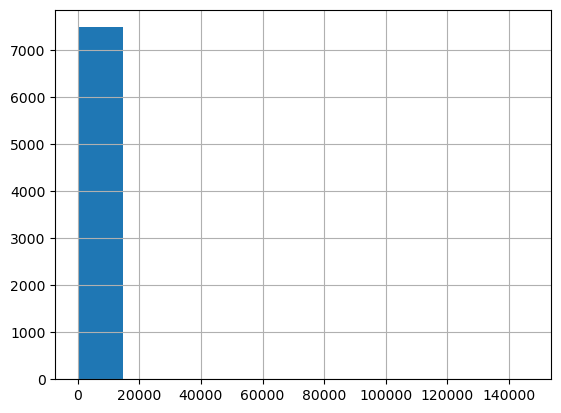

---------------
MarkDown4


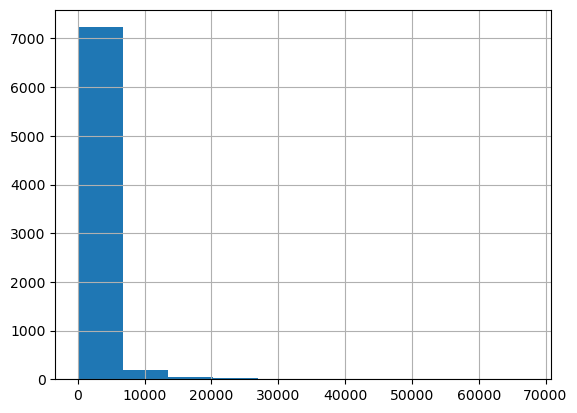

---------------
MarkDown5


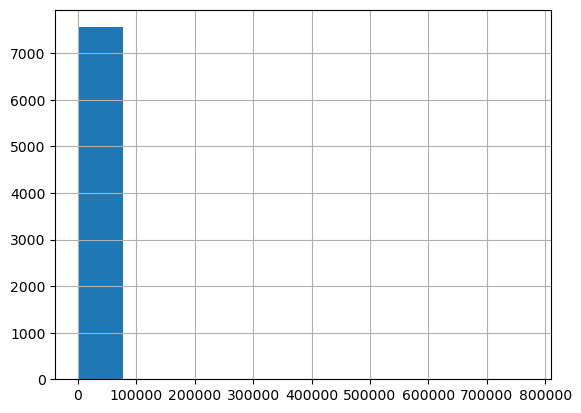

---------------
CPI


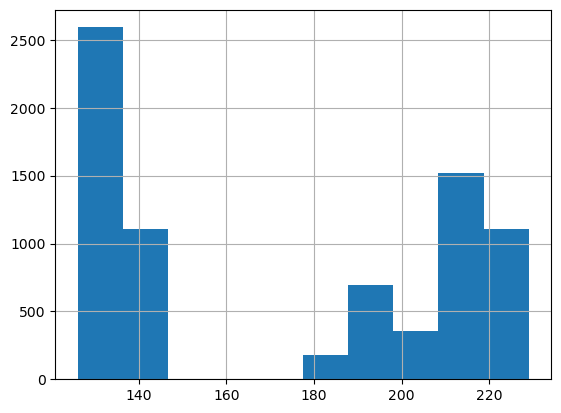

---------------
Unemployment


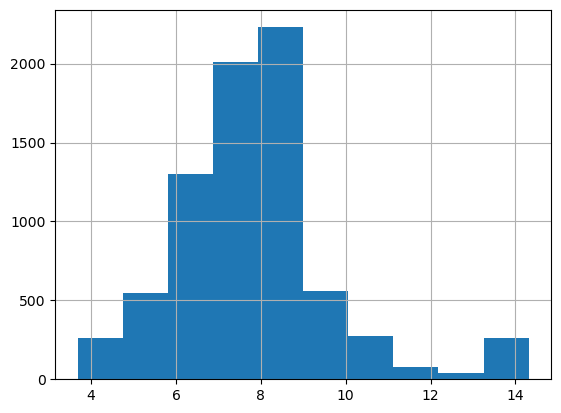

---------------


In [91]:
for i in num_cols:
    print(i)
    df_3[i].hist()
    plt.show()
    print("---------------")

In [92]:
df_1.to_csv('sales_cleaned.csv',index=False)
df_2.to_csv('stores_cleaned.csv',index=False)
df_3.to_csv('features_cleaned.csv',index=False)

## Creating a database a loading all the datasets as tables in database for further SQL analysis

In [209]:
!pip install mysql-connector-python

In [18]:

df = pd.read_csv(f"stores_cleaned.csv")

# Prepare the query
cols = ",".join(df.columns)
values = ",".join(["%s"] * len(df.columns))
sql = f"INSERT INTO stores_cleaned ({cols}) VALUES ({values})"
data = [tuple(row) for _, row in df.iterrows()]

In [ ]:
import mysql.connector
import sqlite3
sqlite_conn = sqlite3.connect("project.db")

# Connect to MySQL
mysql_conn = mysql.connector.connect(
    host="localhost", user="root", password="pass", database="project"
)
mysql_cursor = mysql_conn.cursor()

In [ ]:
# Execute the query for each row
mysql_cursor.executemany(sql, data)

In [24]:
mysql_conn.close()